# Data Exploration
___

We explore the dataset before training algorithms. 

In [45]:
# imports
import pandas as pd
import numpy as np
import zat
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("ZAT version:", zat.__version__)

Pandas version: 1.4.2
Numpy version: 1.21.6
ZAT version: 0.4.4


In [46]:
zat_conn_df = pd.read_csv("../data/processed/bro_conn_complete.csv")
zat_conn_df.head(10)

/var/folders/gx/j98lvm7j4pvds6m3w0frhncw0000gn/T/ipykernel_28848/156839001.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  zat_conn_df = pd.read_csv("../data/processed/bro_conn_complete.csv")


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
0,2015-02-18 09:06:54.702941952,CdAleEeN4vVDGmGO6,59.166.0.8,64111,149.171.126.2,80,tcp,NaN,0 days 00:00:00.000418,0.0,428.0,SF,NaN,0,dfFa,2,104,6,1168,(empty)
1,2015-02-18 09:06:54.797494784,C2qYUz2o1YMdVHBuF8,59.166.0.2,20695,149.171.126.7,80,tcp,NaN,0 days 00:00:00.001710,241.0,428.0,SF,NaN,0,DadfF,4,690,8,1272,(empty)
2,2015-02-18 09:06:54.700005120,CLBiF63bbJHha37Wud,175.45.176.2,6990,149.171.126.13,80,tcp,http,0 days 00:00:00.283791,448.0,407.0,SF,NaN,0,ShADdFfa,10,1328,8,1150,(empty)
3,2015-02-18 09:06:55.161149952,C6ImtG4cKPMql2XQGc,59.166.0.8,21439,149.171.126.4,58003,tcp,ftp-data,0 days 00:00:00.002995,0.0,740.0,SF,NaN,0,ShAdfFa,6,320,8,1904,(empty)
4,2015-02-18 09:06:55.222040832,Ctw6HPG42jQvAKsb5,59.166.0.8,60284,149.171.126.4,30639,tcp,ftp-data,0 days 00:00:00.048400,0.0,4096.0,SF,NaN,0,ShAdfFa,10,528,12,8824,(empty)
5,2015-02-18 09:06:55.355510016,CN2Yl04AX6Hyr4VEGf,59.166.0.9,21316,149.171.126.9,4859,tcp,NaN,0 days 00:00:00.039286,243.0,31495.0,SF,NaN,0,ShADadfF,72,4238,74,66846,(empty)
6,2015-02-18 09:06:55.395245056,CwlY8aG9sH9j50l92,59.166.0.9,23169,149.171.126.5,64885,tcp,NaN,0 days 00:00:00.051878,243.0,39151.0,SF,NaN,0,ShADadfF,84,4862,86,82782,(empty)
7,2015-02-18 09:06:55.477510912,CBKC0435iNwDXpxysh,59.166.0.7,33683,149.171.126.3,80,tcp,NaN,0 days 00:00:00.017936,241.0,428.0,SF,NaN,0,DadfF,4,690,8,1272,(empty)
8,2015-02-18 09:06:55.525486080,Ckn1T82wCOQpvNtBud,59.166.0.1,51418,149.171.126.8,80,tcp,NaN,0 days 00:00:00.017790,241.0,428.0,SF,NaN,0,DadfF,4,690,8,1272,(empty)
9,2015-02-18 09:06:55.648519936,Ca5zJg2YqoRpXMAx32,59.166.0.6,61727,149.171.126.3,80,tcp,NaN,0 days 00:00:00.001657,241.0,428.0,SF,NaN,0,DadfF,4,690,8,1272,(empty)


In [47]:
for col in zat_conn_df.columns:
    print(col)

ts
uid
id.orig_h
id.orig_p
id.resp_h
id.resp_p
proto
service
duration
orig_bytes
resp_bytes
conn_state
local_orig
missed_bytes
history
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
tunnel_parents


## Describing categorical and numeric data

We explore the various categorical columns for their different values. We are specifically looking for some that may explain little variance, and might be dropped

In [48]:
# Our numeric data
zat_conn_df.describe()

,id.orig_p,id.resp_p,orig_bytes,resp_bytes,local_orig,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,3.736540e+06,3.736540e+06,1.982235e+06,1.982235e+06,0.0,3.736540e+06,3.736540e+06,3.736540e+06,3.736540e+06,3.736540e+06
mean,3.009669e+04,1.650479e+04,1.613029e+03,2.031958e+04,NaN,7.782943e+01,2.144182e+01,2.930909e+03,2.721325e+01,2.286756e+04
std,1.985326e+04,2.061551e+04,3.791940e+04,8.404662e+04,NaN,2.530083e+03,6.787716e+01,5.703901e+04,9.806308e+01,1.281264e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.048400e+04,8.000000e+01,1.110000e+02,1.480000e+02,NaN,0.000000e+00,1.000000e+00,5.200000e+01,0.000000e+00,0.000000e+00
50%,2.920300e+04,6.881000e+03,2.430000e+02,7.560000e+02,NaN,0.000000e+00,2.000000e+00,5.360000e+02,2.000000e+00,1.780000e+02
75%,4.746500e+04,3.111300e+04,4.740000e+02,9.629000e+03,NaN,0.000000e+00,1.800000e+01,2.230000e+03,1.800000e+01,3.484000e+03
max,6.553500e+04,6.553500e+04,1.466284e+07,9.361002e+06,NaN,4.119860e+05,2.289400e+04,3.024141e+07,1.425000e+04,1.927385e+07


In [49]:
zat_conn_df['missed_bytes'].value_counts()

0        3721237
2896         306
5792         269
1300         255
241          237
          ...   
1773           1
7446           1
11562          1
10393          1
71465          1
Name: missed_bytes, Length: 4912, dtype: int64

In [50]:
zat_conn_df['conn_state'].value_counts()

SF      1945223
OTH     1654810
S0        68244
SH        42796
SHR       13608
S1        10198
S3          675
RSTO        505
S2          470
RSTR         10
REJ           1
Name: conn_state, dtype: int64

We see that local origin and tunnel parents explain no variance for this set, and we drop this column

In [51]:
zat_conn_df['local_orig'].value_counts()

Series([], Name: local_orig, dtype: int64)

In [52]:
zat_conn_df['tunnel_parents'].value_counts()

(empty)    3736540
Name: tunnel_parents, dtype: int64

In [53]:
zat_conn_df.drop(columns=['local_orig', 'tunnel_parents'], inplace=True)

In [54]:
zat_conn_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,2015-02-18 09:06:54.702941952,CdAleEeN4vVDGmGO6,59.166.0.8,64111,149.171.126.2,80,tcp,NaN,0 days 00:00:00.000418,0.0,428.0,SF,0,dfFa,2,104,6,1168
1,2015-02-18 09:06:54.797494784,C2qYUz2o1YMdVHBuF8,59.166.0.2,20695,149.171.126.7,80,tcp,NaN,0 days 00:00:00.001710,241.0,428.0,SF,0,DadfF,4,690,8,1272
2,2015-02-18 09:06:54.700005120,CLBiF63bbJHha37Wud,175.45.176.2,6990,149.171.126.13,80,tcp,http,0 days 00:00:00.283791,448.0,407.0,SF,0,ShADdFfa,10,1328,8,1150
3,2015-02-18 09:06:55.161149952,C6ImtG4cKPMql2XQGc,59.166.0.8,21439,149.171.126.4,58003,tcp,ftp-data,0 days 00:00:00.002995,0.0,740.0,SF,0,ShAdfFa,6,320,8,1904
4,2015-02-18 09:06:55.222040832,Ctw6HPG42jQvAKsb5,59.166.0.8,60284,149.171.126.4,30639,tcp,ftp-data,0 days 00:00:00.048400,0.0,4096.0,SF,0,ShAdfFa,10,528,12,8824


## Data distributions

We want to see more about the distribution of the data for possible feature engineering approaches

In [55]:
pd.to_datetime(zat_conn_df.iloc[0,0])

Timestamp('2015-02-18 09:06:54.702941952')

In [56]:
zat_conn_df['ts'] = pd.to_datetime(zat_conn_df['ts'])

In [57]:
zat_conn_df['hour'] = zat_conn_df.apply(lambda row: row['ts'].hour, axis=1)

<AxesSubplot:>

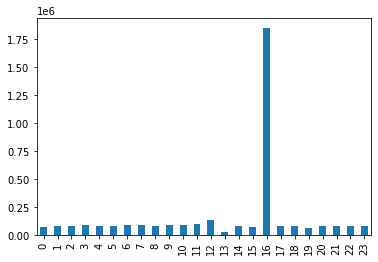

In [72]:
zat_conn_df['hour'].value_counts().sort_index().plot.bar()